In [57]:
import disruptive as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.interpolate import griddata
import numpy as np


In [58]:

project_id='c1qprqlh2t8g02sfoq30'
dt.default_auth = dt.Auth.service_account('C73lmqav1410008ofpvg', 'a97dd7320f7845b7b6c7e2499f9e03c9','c73llpqv1410008ofpug@c1qprqlh2t8g02sfoq30.serviceaccount.d21s.com')

# #CloudConnector=blvjthsc0001nr3n4nt0


sensor = dt.Device.get_device('bjmghou7kro000cp4gng')


device_ids=['bjihp8m7kro000cp1tug','bu6oa4uptglg00ehc5b0','bjmd4i5p0jt000a5cldg','bu6onheptglg00ehcfag','bjihev8pismg008hrkig','bv8t0aqvje9g00eg5ma0','bjqhdclntbig00f92te0','bjqheb5ntbig00f92tng', 'bu6oqm988ueg00albpbg','bu6o15p88ueg00alb6c0', 'bjihd467gpvg00cjpb1g','btmsltc9kjug00dlsibg','bjiier0pismg008hru40', 'btmu2i5pna500081fju0','bjijkbe7kro000cp2feg','btou87tpna500081gi20',
#            'bv8stgs2ven000ch8k2g','bjihanlntbig00e44lc0','bu6nh7h88ueg00alaq2g','bjej76u7gpvg00cjoe20',#            'bjejt50pismg008hqtf0','bjekggtp0jt000aqcsug','bjihmfe7kro000cp1t5g','bjii1qlntbig00e44s50',#            'bjii8c7bluqg00dlv2gg','bjm1ft7bluqg00dlvrng','bjm2u6opismg008ht2a0','bjmgat7bluqg00dm1dt0',#            'bjmgdle7gpvg00cjrvqg','bjmghou7kro000cp4gng','bjqhan67kro000cp7ojg','bjqhc85p0jt000a5gkg0',#            'bt3nmnj853cg00fllacg'           
]
sensorList=[]

for devices in device_ids: 
    sensor = dt.Device.get_device(devices) 
    sensorList.append(sensor.display_name)
    print(sensor.display_name)

print(sensorList)

1OutdoorEntrance
2OfficeDesk
2Fireplace
2BalconyEntrance
2Cooking
2LivingRoomCenter
2LivingRoomHumidifier
2LivingRoomCenterHumidity
2LRWindow
2Stair
1Entrance1
1Entrance2
1GuestRoom
0BRoom
1MainRoom
1MainBRHum
['1OutdoorEntrance', '2OfficeDesk', '2Fireplace', '2BalconyEntrance', '2Cooking', '2LivingRoomCenter', '2LivingRoomHumidifier', '2LivingRoomCenterHumidity', '2LRWindow', '2Stair', '1Entrance1', '1Entrance2', '1GuestRoom', '0BRoom', '1MainRoom', '1MainBRHum']


In [59]:
temperature_data = {}
for device in device_ids:
    # Fetch temperature events for the last 5 days.
    event_history = dt.EventHistory.list_events(
        device_id=device,
        project_id=project_id,
        event_types=[dt.events.TEMPERATURE],
        start_time=datetime.today() - timedelta(days=1),
    )
    # Isolate timeaxis and temperature data which can be plotted directly.
    sensor_name = dt.Device.get_device(device).display_name
    timestamps = [event.data.timestamp for event in event_history]
    temperature = [event.data.celsius for event in event_history]
    # Store the timestamps and temperature data in a dictionary.
    #print(sensor_name)
    temperature_data[sensor_name] = {'timestamps': timestamps, 'temperature': temperature}



[[0.02222222 0.0125     0.008      0.00555556]
 [0.01388889 0.01123596 0.00862069 0.00653595]
 [0.00653595 0.00862069 0.01123596 0.01388889]
 [0.00555556 0.008      0.0125     0.02222222]]
[[0.46101695 0.30973834 0.19823254 0.11525424]
 [0.28813559 0.27841648 0.21361265 0.13559322]
 [0.13559322 0.21361265 0.27841648 0.28813559]
 [0.11525424 0.19823254 0.30973834 0.46101695]]
[22.1   6.15 22.55 22.25]


TypeError: Invalid shape (4,) for image data

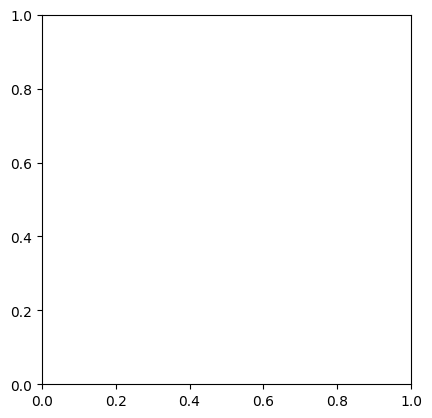

In [189]:
# Define the coordinates of the sensor locations.

x1,x2,x3,x4,y1,y2,y3,y4=0,1,2,3,0,2,4,6
sensor_coords = np.array([[x1, y1], [x2, y2],[x3,y3],[x4,y4]])
N=2
xmin,xmax=-x4,2*x4
ymin,ymax=-y4,2*y4

# Define the measured temperatures at the sensor locations.
sensor_temps = np.array([temperature_data["2LRWindow"]['temperature'][-1:],temperature_data["1OutdoorEntrance"]['temperature'][-1:],temperature_data["2Fireplace"]['temperature'][-1:],temperature_data["2BalconyEntrance"]['temperature'][-1:]])
sensor_temps = sensor_temps.flatten()

# Define the grid points where you want to interpolate the temperature.
xgrid, ygrid = np.meshgrid(np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N))
grid_points = np.column_stack((xgrid.ravel(), ygrid.ravel()))


# Define the IDW interpolation function.
def idw_interpolate(x, y, z, xi, yi, power=2, radius=None):
    distances = np.sqrt((x - xi[:, np.newaxis])**2 + (y - yi[:, np.newaxis])**2)
    #print(distances)
    # if radius is not None:
    #     distances = np.where(distances < radius, distances, np.inf)
    weights = distances**(-power)
    print(weights)
    weights /= np.sum(weights, axis=0)
    zi = np.sum(weights * z, axis=0)
    print(weights)
    return zi

xi,yi=grid_points[:,0],grid_points[:,1]
xtest=xi[:, np.newaxis]
x,y=sensor_coords[:,0], sensor_coords[:,1]
# print(x,y)
# print((xtest.flatten()))

#print((x - xi[:, np.newaxis])**2)
# Interpolate the temperature at the grid points using IDW interpolation.
interpolated_temps = idw_interpolate(sensor_coords[:,0], sensor_coords[:,1], sensor_temps, grid_points[:,0], grid_points[:,1], power=2)
print(interpolated_temps)
# Reshape the interpolated temperatures to match the grid shape.
#interpolated_temps = np.reshape(interpolated_temps,(N,N))
#interpolated_temps = interpolated_temps.reshape((N,N))


# Plot the interpolated temperatures as a heatmap.
import matplotlib.pyplot as plt
plt.imshow(interpolated_temps, origin='lower', extent=[xmin, xmax, ymin, ymax])
plt.colorbar()
plt.show()


In [ ]:

plt.figure(1)
for devices in device_ids: 
    # Generate a plot using the fetched timeaxis and temperature values.    
    sensor_name = dt.Device.get_device(devices).display_name 
    plt.plot(temperature_data[sensor_name]['timestamps'], temperature_data[sensor_name]['temperature'], '.',label=sensor_name) 
    plt.legend()
plt.grid()
plt.xlabel('Timestamp')
plt.ylabel('Temperature [C]')
plt.show()



KeyError: '1OutdoorEntrance'

<Figure size 640x480 with 0 Axes>

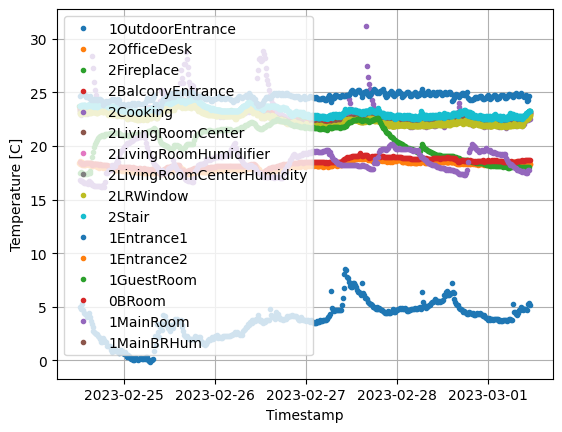

In [ ]:

plt.figure(1)
for devices in device_ids: 
    # Fetch temperature events for the last 2 days.    
    event_history = dt.EventHistory.list_events( 
    device_id=devices, project_id=project_id, 
    event_types=[dt.events.TEMPERATURE], 
    start_time=datetime.today()-timedelta(days=5),) 
    # Isolate timeaxis and temperature data which can be plotted directly.    
    timestamps = [event.data.timestamp for event in event_history]
    temperature = [event.data.celsius for event in event_history]
    # Generate a plot using the fetched timeaxis and temperature values.    
    sensor_name = dt.Device.get_device(devices).display_name 
    plt.plot(timestamps, temperature, '.',label=sensor_name) 
    plt.legend()
plt.grid()
plt.xlabel('Timestamp')
plt.ylabel('Temperature [C]')
plt.show()

